# [Project] 자동차 리콜 데이터 분석

---

## 프로젝트 목표
- 한국교통안전공단 자동차 결함 리콜 데이터를 분석하여 유의미한 정보 도출
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습

---

## 프로젝트 목차
1. **데이터 읽기:** 자동차 리콜 데이터를 불러오고 Dataframe 구조를 확인<br>
    1.1. 데이터 불러오기<br>
<br> 
2. **데이터 정제:** 결측치 확인 및 기초적인 데이터 변형<br>
    2.1. 결측치 확인<br>
    2.2. 중복값 확인<br>
    2.3. 기초적인 데이터 변형<br>
<br>
3. **데이터 시각화:** 각 변수 별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 통하여 데이터의 특성 파악<br>
    3.1. 제조사별 리콜 현황 출력<br>
    3.2. 모델별 리콜 현황 출력<br>
    3.3. 월별 리콜 현황 출력<br>
    3.4. 생산연도별 리콜 현황 출력<br>
    3.5. 4분기 제조사별 리콜 현황 출력<br>
    3.6. 하반기 생산연도별 리콜 현황 출력<br>
    3.7. 워드 클라우드를 이용한 리콜 사유 시각화<br>

---

## 데이터 출처
-  https://www.data.go.kr/data/3048950/fileData.do

---

## 프로젝트 개요

리콜(recall)은 제품의 설계, 제조 단계에서 결함이 발견되었을 시 문제 예방의 차원에서 판매자가 무상으로 수리, 점검 및 교환을 해주는 소비자 보호 제도입니다. 집집마다 개인용 자동차를 보유하게 되면서 자동차는 어느덧 우리 삶의 일상재가 되었지만, 안전성에 대해서는 산발적인 문제 제기가 계속되고 있고, 이에 따라 전격적인 자동차 리콜 사태도 종종 발생하여 화제를 모으곤 합니다.

이번 프로젝트에서는 한국교통안전공단에서 제공한 2020년 자동차 결함 리콜 데이터를 활용하여 유의미한 패턴 및 인사이트를 발굴하고 시각화하는 실습을 진행하도록 하겠습니다.

---

## 1. 데이터 읽기

필요한 패키지 설치 및 `import`한 후 `pandas`를 사용하여 데이터를 읽고 어떠한 데이터가 저장되어 있는지 확인합니다.

### 1.1. 데이터 불러오기

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
!pip install seaborn==0.9.0
import seaborn as sns
print(sns.__version__)
# missingno라는 라이브러리가 설치되어 있을 경우 import
try: 
    import missingno as msno
# missingno라는 라이브러리가 설치되어 있지 않을 경우 설치 후 import
except: 
    !pip install missingno
    import missingno as msno
#missingno: 결측치를 시각화하는 라이브러리
#try-except: 예외처리방법으로, try 블록을 수행하던 중에 오류가 발생하면 except 블록이 수행된다.

     |████████████████████████████████| 208 kB 18.7 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1
0.9.0


In [2]:
# pd.read_csv를 통하여 dataframe 형태로 읽어옵니다.
df = pd.read_csv("./data/한국교통안전공단_자동차결함 리콜현황_20201231.csv", encoding="cp949")

In [3]:
# 상위 5개 데이터를 출력합니다.
df.head()

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."


In [4]:
# dataframe 정보를 요약하여 출력합니다. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제작자     1275 non-null   object
 1   차명      1275 non-null   object
 2   생산기간    1275 non-null   object
 3   생산기간.1  1275 non-null   object
 4   리콜개시일   1275 non-null   object
 5   리콜사유    1275 non-null   object
dtypes: object(6)
memory usage: 59.9+ KB


---

## 2. 데이터 정제

데이터를 읽고 확인했다면 결측값(missing data), 중복값(duplicates)을 처리하고 열 이름 변경과 같은 기초적인 데이터 변형을 진행해봅시다.

### 2.1. 결측치 확인

**(1)`missingno.matrix()` 함수를 이용하여 결측치를 시각화해봅시다.**

In [5]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

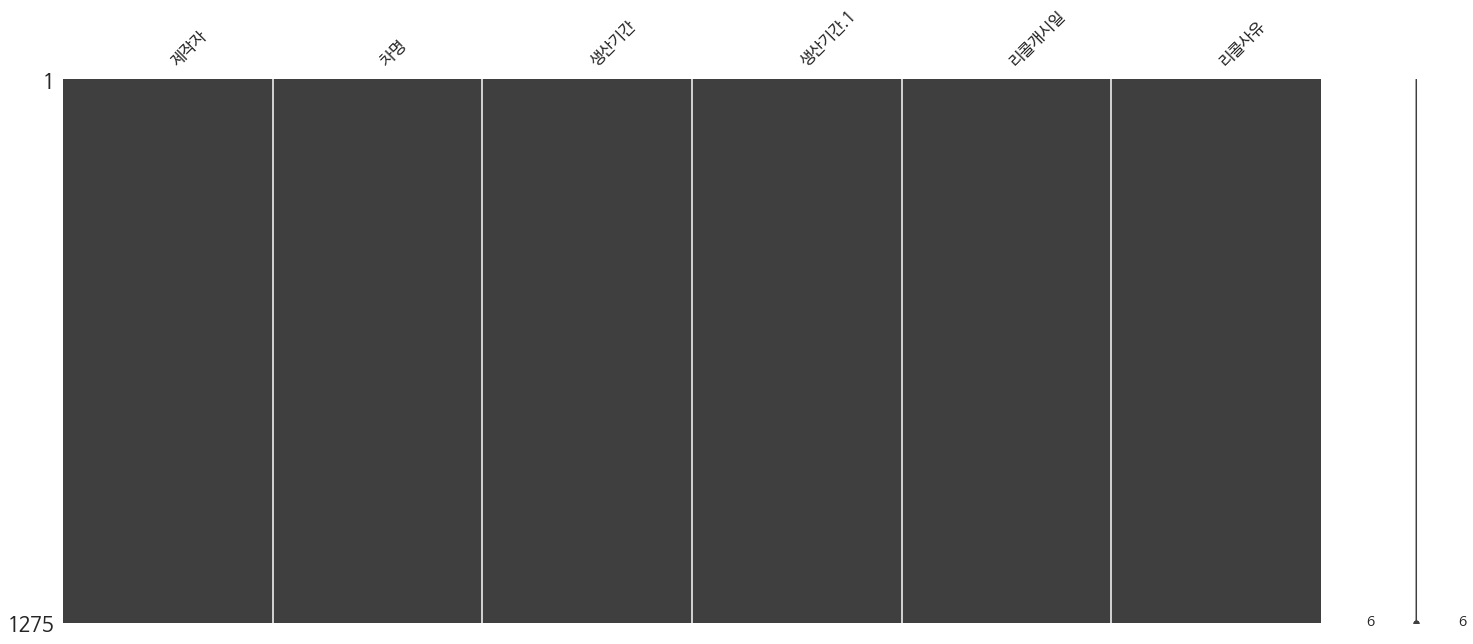

In [6]:
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False})
msno.matrix(df)
plt.show()

**(2)`isna()` 함수를 이용하여 결측치를 확인해봅시다.**

In [7]:
df.isna().sum() 

제작자       0
차명        0
생산기간      0
생산기간.1    0
리콜개시일     0
리콜사유      0
dtype: int64

### 2.2. 중복값 확인

**(1)`duplicated()` 함수를 이용하여 중복값을 확인해봅시다.**

In [8]:
df[df.duplicated(keep=False)]

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
34,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
82,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...


**(2)`drop_duplicates()` 함수를 이용하여 중복값을 제거합니다.**

In [9]:
print("Before:", len(df))
df = df.drop_duplicates()
print("After:", len(df))

Before: 1275
After: 1274


**(3) reset_index 함수를 이용해 인덱싱을 재설정합니다.**

In [10]:
df=df.reset_index(drop=True)

### 2.3. 기초적인 데이터 변형

현재 `생산기간`, `생산기간.1`, `리콜개시일` 열은 모두 `object` 타입, 즉 문자열로 인식되고 있습니다. 분석을 위해 연도, 월, 일을 각각 정수형으로 저장합니다. <br>
추가적으로 분석의 편리를 위해 열 이름을 영어로 바꿔줍니다.

**(1) 연도-월-일 형식으로 구성된 생산기간, 생산기간.1, 리콜개시일 데이터에서 연도와 월과 일을 분리합니다.**

**(1.1) 먼저 for문을 사용해서 분리해봅시다.**

In [11]:
year=[]
month=[]
day=[]

for i in df['생산기간']:
    year.append(int(i[:4]))
    month.append(int(i[5:7]))
    day.append(int(i[8:]))

In [12]:
def parse_year(s):
    return int(s[:4])
def parse_month(s):
    return int(s[5:7])
def parse_day(s):
    return int(s[8:])
print(parse_day('2014-08-08'))

8


**(1.2) Apply를 사용해서 분리할 수도 있습니다.**

In [13]:
def parse_year(s):
    return int(s[:4])
def parse_month(s):
    return int(s[5:7])
def parse_day(s):
    return int(s[8:])

# Pandas DataFrame에서는 row별로 loop를 도는 것이 굉장히 느리기 때문에, apply() 함수를 이용하여 벡터 연산을 진행합니다.
df['start_year'] = df['생산기간'].apply(parse_year)
df['start_month'] = df['생산기간'].apply(parse_month)
df['start_day'] = df['생산기간'].apply(parse_day)

df['end_year'] = df['생산기간.1'].apply(parse_year)
df['end_month'] = df['생산기간.1'].apply(parse_month)
df['end_day'] = df['생산기간.1'].apply(parse_day)

df['recall_year'] = df['리콜개시일'].apply(parse_year)
df['recall_month'] = df['리콜개시일'].apply(parse_month)
df['recall_day'] = df['리콜개시일'].apply(parse_day)

df.head(3)

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,3,14,2020,3,23
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",2019,7,11,2019,7,31,2020,1,23


**(1.3) Apply 함수 예시를 보여드리겠습니다.**

In [14]:
#먼저 예시로 사용할 데이터프레임을 만든다.

aa=pd.DataFrame([[4,9],[1,4],[5,6]],columns=['A','B'])

In [15]:
aa

,A,B
0,4,9
1,1,4
2,5,6


In [16]:
#사용자가 데이터 프레임에 적용하고 싶은 함수를 작성한다

def plus(x):
    x+=1
    return x

In [17]:
#aa라는 데이터프레임의 열 'A'에 plus함수를 적용한다.

aa['A'].apply(plus)

0    5
1    2
2    6
Name: A, dtype: int64

**(2) 불필요한 열 '생산기간', '생산기간.1', '리콜개시일'을 drop 함수를 이용해 삭제해봅시다.**

In [18]:
df=df.drop(['생산기간', '생산기간.1', '리콜개시일'],axis=1)

**(3) rename 함수를 이용해서 '제작자','차명','리콜사유' 열 이름을 바꿔봅시다.**

In [19]:
df=df.rename(columns={'제작자': "manufacturer", "차명": "model", "리콜사유": "cause"})

**(4)본 분석에서는 2020년의 데이터만을 대상으로하므로, 그 외의 데이터가 있다면 삭제해주겠습니다.**

In [20]:
df=df[df['recall_year']==2020]

---

## 3. 데이터 시각화

각 column의 변수별로 어떠한 데이터 분포를 하고 있는지 시각화를 통하여 알아봅시다.

### 3.1. 제조사별 리콜 현황 출력

제조사별 리콜 건수 분포를 막대 그래프로 확인해보겠습니다.

**(1)groupby 함수를 이용해서 제조업자별 리콜된 횟수를 구해봅시다.**

In [21]:
df.groupby("manufacturer").count()

,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
manufacturer,,,,,,,,,,,
(주) 다빈월드,1,1,1,1,1,1,1,1,1,1,1
(주) 바이크코리아,12,12,12,12,12,12,12,12,12,12,12
(주) 한국모터트레이딩,16,16,16,16,16,16,16,16,16,16,16
(주)볼보자동차코리아,39,39,39,39,39,39,39,39,39,39,39
(주)스즈키씨엠씨,1,1,1,1,1,1,1,1,1,1,1
(주)스포츠모터사이클코리아,4,4,4,4,4,4,4,4,4,4,4
(주)에이비케이,2,2,2,2,2,2,2,2,2,2,2
(주)에프엠케이,9,9,9,9,9,9,9,9,9,9,9
(주)재규어랜드로버코리아,7,7,7,7,7,7,7,7,7,7,7


**(1.1) groupby한 데이터에서 'model' 변수만을 보여줍니다. 이때, 순서는 sort_values 함수를 활용해 내림차순으로 보여주겠습니다.**

In [22]:
df.groupby("manufacturer").count()['model'].sort_values(ascending=False)

manufacturer
비엠더블유코리아(주)           526
메르세데스벤츠코리아(주)         234
아우디폭스바겐코리아(주)         115
한불모터스(주)               71
한국토요타자동차(주)            54
(주)볼보자동차코리아            39
현대자동차(주)               28
기아자동차(주)               19
(주) 한국모터트레이딩           16
한국지엠주식회사               15
포드세일즈서비스코리아(유)         14
화창상사(주)                14
다임러트럭코리아(주)            13
(주) 바이크코리아             12
만트럭버스코리아(주)            11
혼다코리아(주)               10
(주)에프엠케이                9
에프씨에이코리아(주)             7
(주)재규어랜드로버코리아           7
한국닛산(주)                 7
대전기계공업(주)               6
르노삼성자동차(주)              6
포르쉐코리아 주식회사             5
유한회사 모토로싸               4
(주)스포츠모터사이클코리아          4
기흥인터내셔널 유한회사            4
허스크바나모터싸이클코리아 주식회사      3
쌍용자동차(주)                3
(주)에이비케이                2
(주) 다빈월드                1
지엠아시아퍼시픽지역본부 주식회사       1
아이씨피(주)                 1
(주)스즈키씨엠씨               1
스카니아코리아그룹(주)            1
Name: model, dtype: int64

**(1.2)제조업자별로 리콜횟수를 구해봤습니다. 하지만 변수명이 'model'이죠? rename을 이용해 'count'로 바꿔줍니다.**

In [23]:
tmp=pd.DataFrame(df.groupby("manufacturer").count()["model"].sort_values(ascending=False)).rename(columns={"model": "count"})

**(2)그래프로 manufacturer별 리콜횟수를 나타내겠습니다.**

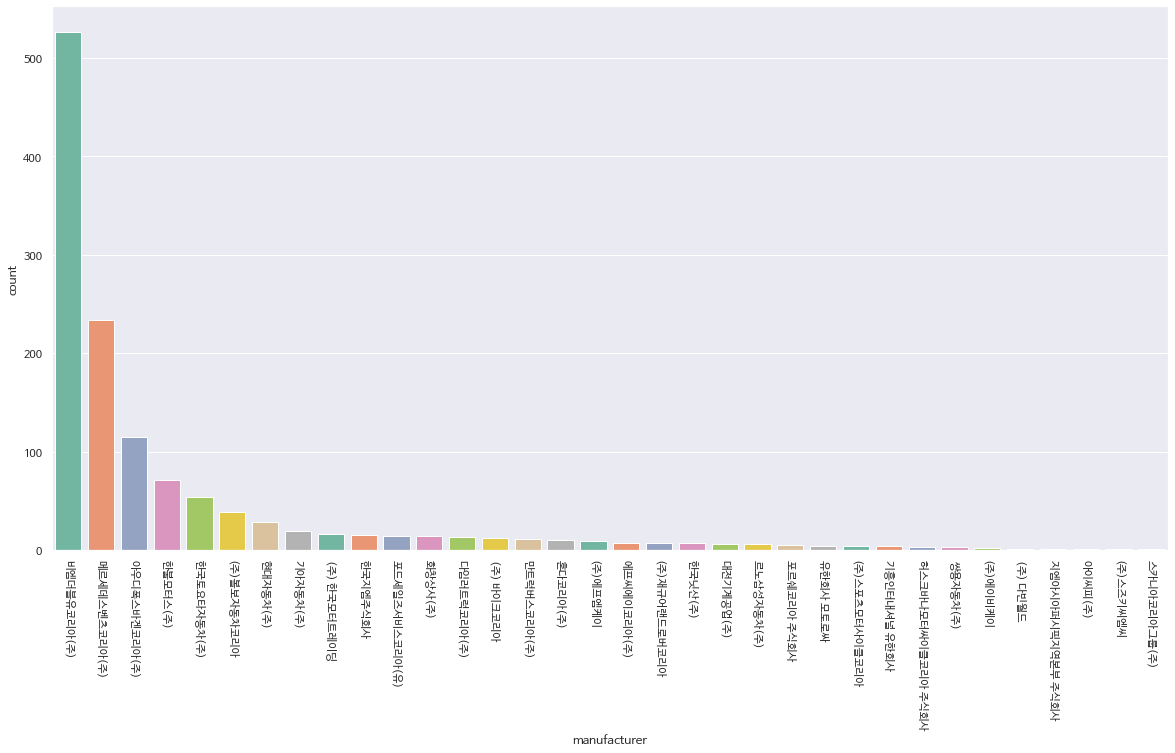

In [24]:
plt.figure(figsize=(20,10))
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="manufacturer", data=df, palette="Set2", order=tmp.index)
plt.xticks(rotation=270)
plt.show()

### 3.2. 모델별 리콜 현황 출력

차량 모델별 리콜 건수 분포를 막대 그래프로 확인해보겠습니다.

**(1)groupby 함수를 이용해서 model별 리콜된 횟수를 구해봅시다.**

In [25]:
df.groupby("model").count()

,manufacturer,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
model,,,,,,,,,,,
2013-2015년식 Fusion,1,1,1,1,1,1,1,1,1,1,1
2013-2017년식 MKZ,1,1,1,1,1,1,1,1,1,1,1
2015-2016년식 Mondeo,1,1,1,1,1,1,1,1,1,1,1
2015-2017 년식 Mondeo,1,1,1,1,1,1,1,1,1,1,1
2015-2018년식 Mondeo,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
토요타 프리우스 V,1,1,1,1,1,1,1,1,1,1,1
투싼(TL),1,1,1,1,1,1,1,1,1,1,1
트래버스,3,3,3,3,3,3,3,3,3,3,3


**(1.1) groupby한 데이터에서 'manufacturer' 변수만을 보여줍니다. 이때, 순서는 sort_values 함수를 활용해 내림차순으로 보여주겠습니다.**

In [26]:
df.groupby("model").count()['manufacturer'].sort_values(ascending=False)

model
BMW 320d                           15
BMW 520d                           15
BMW X3 xDrive20d                   11
BMW 520d xDrive                    10
BMW 320d Gran Turismo               9
                                   ..
E 220 D Cabriolet                   1
E 200 BlueEFFICIENCY Coupe          1
E 200 BlueEFFICIENCY Cabrioloet     1
DS7 Crossback 2.0 BlueHDi           1
티볼리(디젤)                             1
Name: manufacturer, Length: 638, dtype: int64

**(1.2)차명별로 리콜횟수를 구해봤습니다. 하지만 변수명이 'manufacturer'이죠? rename을 이용해 'count'로 바꿔줍니다.**

In [27]:
tmp=pd.DataFrame(df.groupby("model").count()["manufacturer"].sort_values(ascending=False)).rename(columns={"manufacturer": "count"})

**(2)모델은 굉장히 많으므로, 상위 50개 모델만 뽑아서 시각화를 진행해보겠습니다.**

In [28]:
tmp=pd.DataFrame(tmp['count'].sort_values(ascending=False).head(50))

**(2)그래프로 model별 리콜횟수를 나타내겠습니다.**

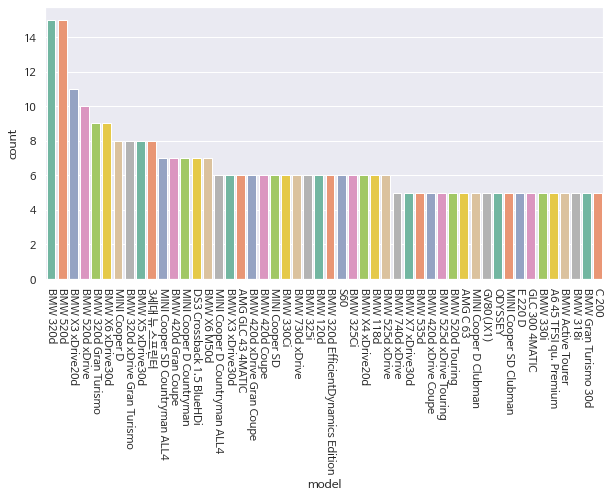

In [30]:
# 그래프의 사이즈를 조절합니다.
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="model", data=df[df.model.isin(tmp.index)], palette="Set2", order=tmp.index)
plt.xticks(rotation=270)
plt.show()

### 3.3. 월별 리콜 현황 출력

월별 리콜 건수 분포를 막대 그래프로 확인해보겠습니다.

**(1)groupby 함수를 이용해서 recall_month별 리콜된 횟수를 구해봅시다.**

**(1.1) groupby한 데이터에서 'manufacturer' 변수만을 보여줍니다. 이때, 순서는 sort_values 함수를 활용해 내림차순으로 보여주겠습니다.**

In [31]:
tmp=pd.DataFrame(df.groupby("recall_month").count()["manufacturer"].sort_values(ascending=False)).rename(columns={"manufacturer": "count"})

**(1.2)recall_month별로 리콜횟수를 구해봤습니다. 하지만 변수명이 'manufacturer'이죠? rename을 이용해 'count'로 바꿔줍니다.**

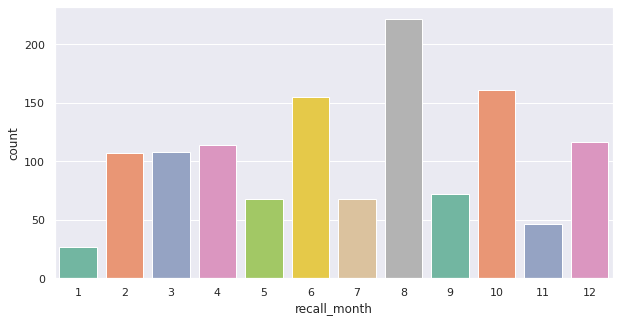

In [32]:
# 그래프의 사이즈를 조절합니다.
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(style="darkgrid")
ax = sns.countplot(x="recall_month", data=df, palette="Set2")
plt.show()

**퀴즈! '비엠더블유코리아(주)'의 월별 리콜 분포를 출력하려면 어떻게 해야될까요? 힌트: 조건문으로 manufacturer이 비엠더블유코리아(주)인 데이터를 출력한 후, 앞의 월별 리콜 분포를 참고합니다.**

### 3.4. 생산연도별 리콜 현황 출력

이번에는 생산연도별 리콜 현황을 꺾은선 그래프로 알아보겠습니다.

In [33]:
tmp=pd.DataFrame(df.groupby("start_year").count()["model"]).rename(columns={"model": "count"})

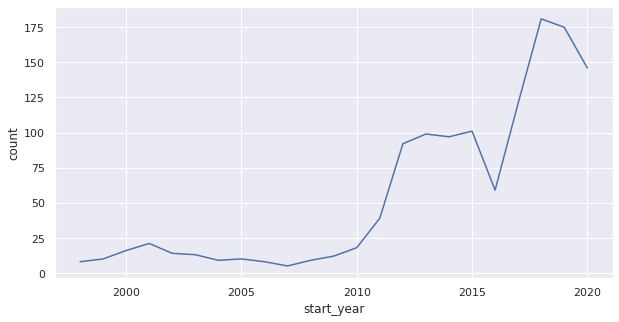

In [34]:
# 그래프의 사이즈를 조절합니다.
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(style="darkgrid")
sns.lineplot(data=tmp, x=tmp.index, y="count")
plt.show()

#### 퀴즈 1. 2020년에 리콜 개시가 가장 많이 일어난 달(month)과 가장 적게 일어난 달의 차이(건수)를 구하세요.

In [ ]:
#힌트: 생산연도별 리콜 현황 출력에서 tmp 데이터에 sort_values를 적용해봅니다.

In [ ]:
# 퀴즈의 답을 구하여 quiz_1 변수에 저장합니다.
# integer 형 상수값으로 저장합니다.
quiz_1 = None

### 3.5. 4분기 제조사별 리콜 현황 출력

가장 최근 데이터인 2020년 4분기(10, 11, 12월) 제조사별 리콜 현황을 시각화해봅시다.

**(1) 논리연산 isin을 이용해 recall_month가 10,11,12월에 해당하는 데이터를 출력합니다.**

In [35]:
df[df.recall_month.isin([10,11,12])]

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
438,비엠더블유코리아(주),BMW 120d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,11,2014,11,24,2020,10,1
442,비엠더블유코리아(주),BMW 220d Coupe,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,10,11,2014,5,23,2020,10,1
446,비엠더블유코리아(주),BMW 320d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,28,2015,6,30,2020,10,1
450,비엠더블유코리아(주),BMW 320d EfficientDynamics Edition,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2011,11,8,2015,6,29,2020,10,1
454,비엠더블유코리아(주),BMW 320d Gran Turismo,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,26,2015,5,21,2020,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,한국닛산(주),INFINITI M30,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2012,2,6,2012,2,6,2020,12,28
1270,한국닛산(주),INFINITI M30d,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2012,7,18,2013,6,28,2020,12,28
1271,한국닛산(주),INFINITI Q70 3.0d,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2013,9,18,2015,6,23,2020,12,28
1272,한국닛산(주),INFINITI M56,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2010,5,25,2011,11,23,2020,12,28


**(2)그래프를 그려봅니다.**

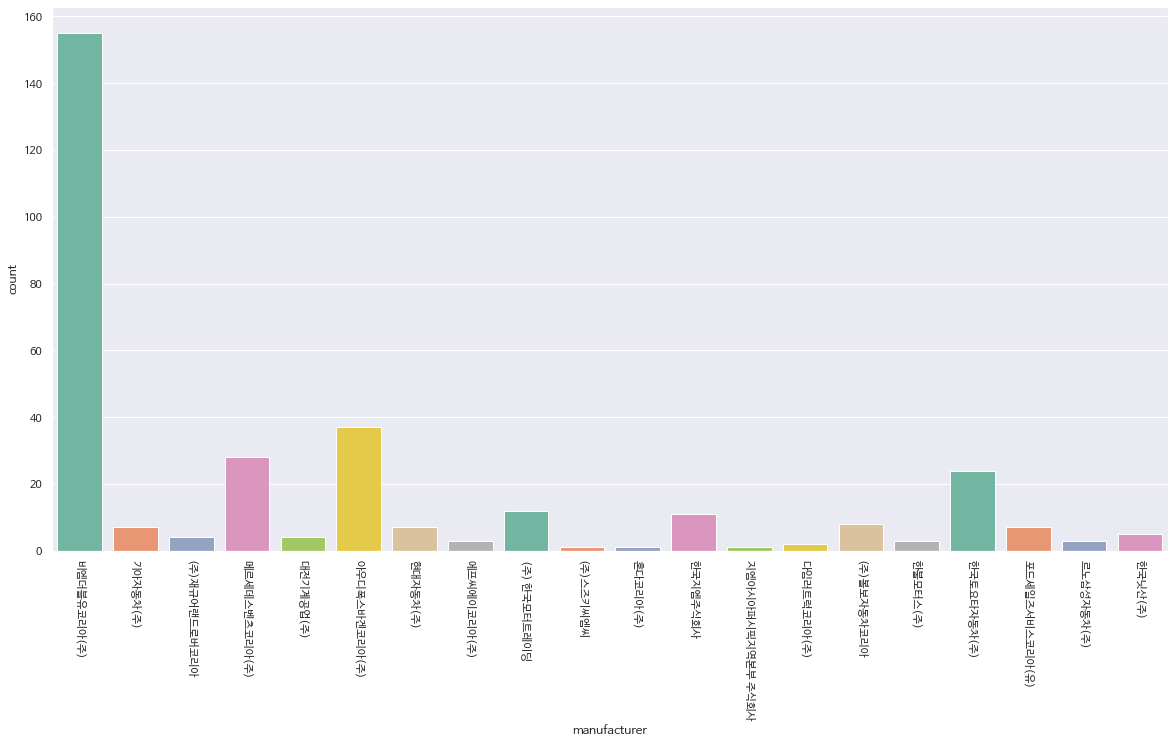

In [36]:
plt.figure(figsize=(20,10))
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="manufacturer", data=df[df.recall_month.isin([10,11,12])], palette="Set2")
plt.xticks(rotation=270)
plt.show()

### 3.6. 하반기 생산연도별 리콜 현황 출력

이번에는 2020년 하반기(7~12월)에 개시된 리콜 건들을 생산 개시 연도를 기준으로 시각화해봅시다.

**(1) 조건문을 이용해 recall_month를 7월부터 12월까지 출력합니다.**

In [37]:
df[df.recall_month>=7]

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
436,비엠더블유코리아(주),BMW 118d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2015,3,2,2019,4,29,2020,8,1
438,비엠더블유코리아(주),BMW 120d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,11,2014,11,24,2020,10,1
440,비엠더블유코리아(주),BMW 120d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2015,3,13,2015,4,15,2020,8,1
442,비엠더블유코리아(주),BMW 220d Coupe,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,10,11,2014,5,23,2020,10,1
444,비엠더블유코리아(주),BMW 220d Coupe,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2014,10,16,2015,2,25,2020,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,한국닛산(주),INFINITI M30,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2012,2,6,2012,2,6,2020,12,28
1270,한국닛산(주),INFINITI M30d,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2012,7,18,2013,6,28,2020,12,28
1271,한국닛산(주),INFINITI Q70 3.0d,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2013,9,18,2015,6,23,2020,12,28
1272,한국닛산(주),INFINITI M56,프로펠러 샤프트의 내구성이 저하될 수 있습니다.,2010,5,25,2011,11,23,2020,12,28


**(2) 그래프를 출력합니다.**

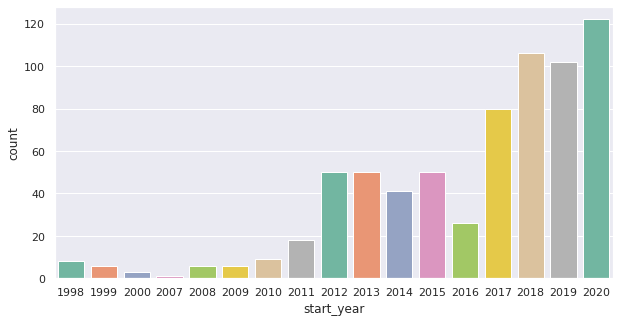

In [38]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
ax = sns.countplot(x="start_year", data=df[df.recall_month>=7], palette="Set2")
plt.show()

### 3.7. 워드 클라우드를 이용한 리콜 사유 시각화

워드 클라우드를 이용하여 리콜 사유를 시각화해보도록 하겠습니다.

**(1)워드 클라우드 생성을 도와주는 패키지를 가져옵니다.**

In [39]:
try:
    from wordcloud import WordCloud, STOPWORDS
except:
    !pip install wordcloud
    from wordcloud import WordCloud, STOPWORDS

     |████████████████████████████████| 458 kB 16.5 MB/s eta 0:00:01


In [40]:
# 문법적인 성분들을 배제하기 위해 stopwords들을 따로 저장해둡니다.
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

**(2)영어를 사용할 때는 상관 없지만, 우리말을 쓸 때에는 적합하지 않습니다. 여기서는 예시로 몇 개의 stopwords들을 수기로 저장해보겠습니다.**

In [41]:
spwords = set(["동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당"])

**(3)리콜 사유에 해당하는 열의 값들을 중복 제거한 뒤 모두 이어붙여서 text라는 문자열로 저장합니다.**

In [43]:
text = ""

for c in df.cause.drop_duplicates():
    text += c

text

'스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑 & 고) 2) 결함 원인 : 오토 스타트 결함(스탑&고 작동 시 재시동 불가 현상)은 과도한 전압강하로 인해 발생되며 이는 충분한 전류량이 흐를 수 없는 불충분한 엔진 배선 및 주 양극 배선 사이즈로 인해 유발됨콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품 내부에 균열이 발생할 가능성이 있음.뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부의 스프링이 바르게 장착 되지 않았을 가능성이 있음. *시트벨트 리트랙터 잠금장치: 급정지나 충격이 있을 경우 또는 시트벨트가 빠르게 당겨질 경우에 시트벨트가 풀어지지 않게 잠그는 장치비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 운행조건에서 크랭크축이 파손될 수 있는 가능성이 확인되었습니다.사이드 스탠드 제조 공정상 용접 불량으로 사이드 스탠드의 용접 부위가 부러질 수 있음. (#참고 사항 : 2019년식 이후 모델에 장착된 사이드 스탠드는 공급사가 바뀌면서 이와 같은 문제 없음)2019년 01월 30일부터 2019년 10월 21일까지 생산된 BMW M5, M8 Competition 모델 중 171대 차량의 변속기 배선 고정 공정 과정에서 배선을 고정하는 클립을 잘 못 장착하여 고정된 위치가 과도한 압착 및 변속기 등 주변에서 발생하는 열에 영향을 받아 배선이 단락 될 수 있습니다.2017년식 Explorer 차량의 전동시트(파워시트) 프레임 트랙의 가장자리에 날카로운 마무리가 남아있을 수 있습니다. 이렇게, 시트 프레임 트랙의 날카로운 마무리로 인하여, 앞좌석과 콘솔 사이에 손을 넣으면 다칠 수 있는 위험이 있기 때문에 이를 예방하기 위해 제작결함을 시정하고자 함2015-2018년식 Mondeo 차량은 시간이 지남에 따라 배터리 음극(-)단자 주변에 황산구리가 생성될 수 있으며, 생성된 황산구리로 인하여 배터리 모니터링 센서 하단부

**(4)워드 클라우드를 생성하고 시각화해보겠습니다.**

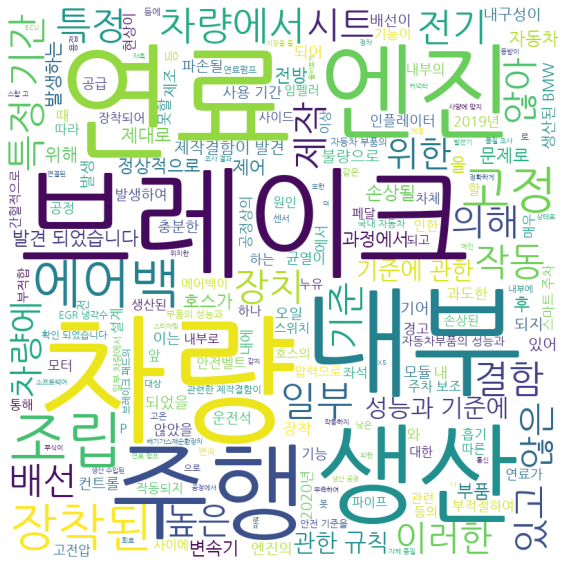

In [44]:
# 한글을 사용하기 위해서는 폰트를 지정해주어야 합니다.
wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                background_color='white', width=800, height=800)
wc1.generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wc1)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

#### 퀴즈 2. 기아자동차(주)의 제품 중 가장 최근에 리콜이 개시된 제품의 모델명을 구하세요. 

In [ ]:
# 퀴즈의 답을 구하여 quiz_2 변수에 저장합니다.
# 문자형으로 저장합니다.
quiz_2 = None

 ---

## 제출하기

퀴즈 1번과 2번을 수행 후, 아래 코드를 실행하면 `quiz_1 ~ 2` 변수가 저장된 csv 파일을 제작하여 채점을 받을 수 있습니다.

**아래 코드를 수정하면 채점이 불가능 합니다.**

In [ ]:
d = {'quiz_1': [quiz_1], 'quiz_2': [quiz_2]}
df_quiz = pd.DataFrame(data=d)
df_quiz.to_csv("submission.csv",index=False)

In [ ]:
answer=pd.read_csv('submission.csv')
answer.loc[0]['quiz_2']

In [ ]:
# 채점을 수행하기 위하여 로그인
import sys
sys.path.append('vendor')
from elice_challenge import check_score, upload

In [ ]:
# 제출 파일 업로드
await upload()

In [ ]:
# 채점 수행
await check_score()